# 주제 : <br>우리 애는 머리는 좋은데, 공부를 안해서 그래요 - 데이터로 살펴보는 우리 아이 학습 성공/실패 요소
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 xAPI-Edu-Data 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    xAPI-Edu-Data.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 과목 공지를 확인한 횟수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)
        
    
    
- 데이터 출처: https://www.kaggle.com/aljarah/xAPI-Edu-Data

## 최종 목표
    - 연구용 Tabular 데이터의 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Logistic Regression, XGBoost 기반의 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 의료 데이터셋에 대하여

### 연구용 데이터의 목적


### 연구용 데이터의 인용


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [2]:
!ls

Chapter 02 - 우리 애는 머리는 좋은데, 공부를 안해서 그래요(문제).ipynb
Chapter 02 - 우리 애는 머리는 좋은데, 공부를 안해서 그래요(해설).ipynb
xAPI-Edu-Data.csv


In [4]:
# csv파일 읽어들이기
df = pd.read_csv("xAPI-Edu-Data.csv") 

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [8]:
# columns


Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [9]:
# gender


M    305
F    175
Name: gender, dtype: int64

In [10]:
# NationalITy


KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

In [11]:
# PlaceofBirth


KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

### 문제 5. 수치형 데이터의 히스토그램 그리기


Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

<AxesSubplot:xlabel='raisedhands', ylabel='Count'>

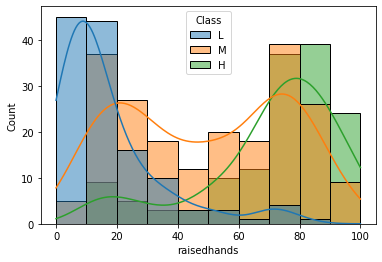

In [15]:
# raisedhands


<AxesSubplot:xlabel='VisITedResources', ylabel='Count'>

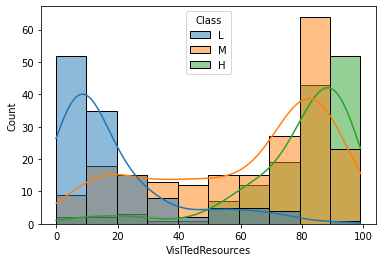

In [16]:
# VisITedResources




<AxesSubplot:xlabel='AnnouncementsView', ylabel='Count'>

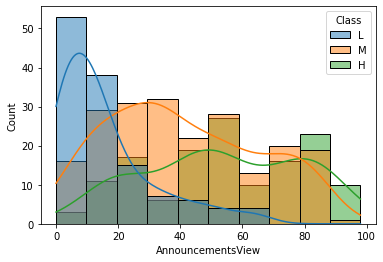

In [17]:
# AnnouncementsView



<AxesSubplot:xlabel='Discussion', ylabel='Count'>

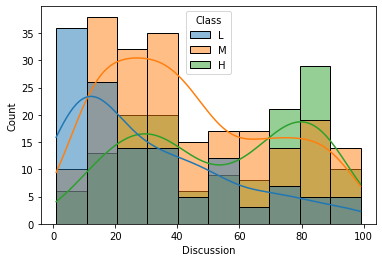

In [18]:
# Discussion


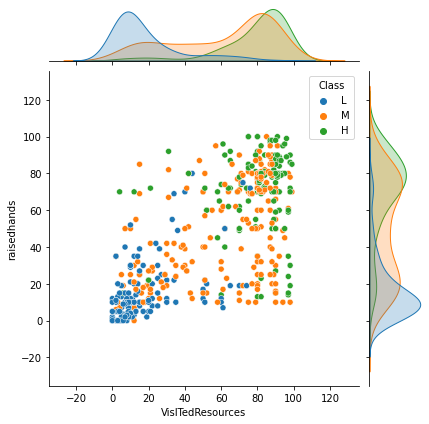

In [20]:
# VisITedResources, raisedhands


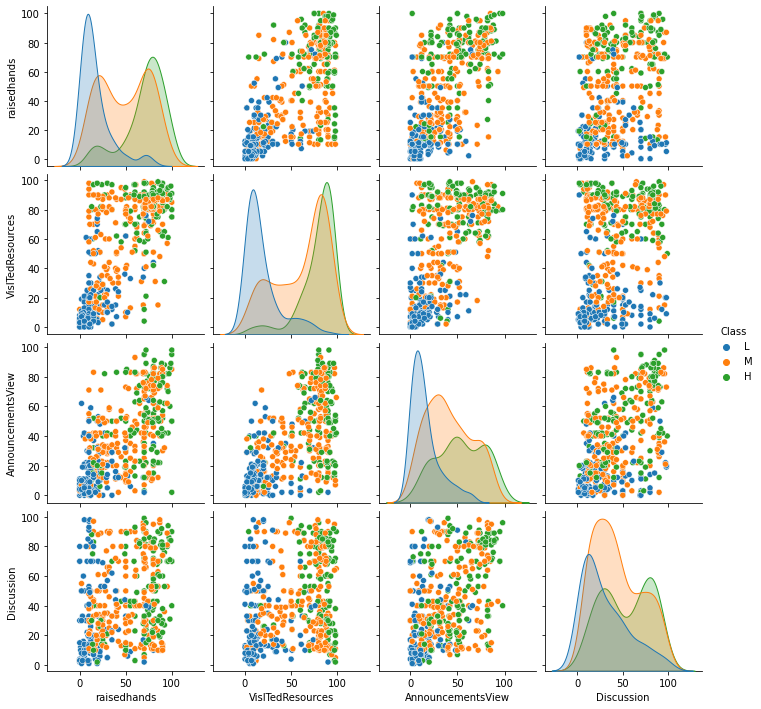

### 문제 6. Countplot을 이용하여 범주별 통계 확인하기


<AxesSubplot:xlabel='Class', ylabel='count'>

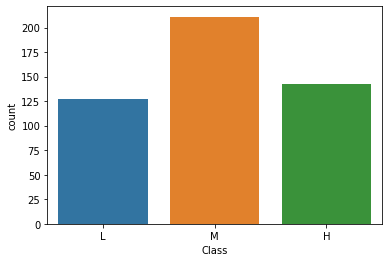

In [25]:
# Class


<AxesSubplot:xlabel='gender', ylabel='count'>

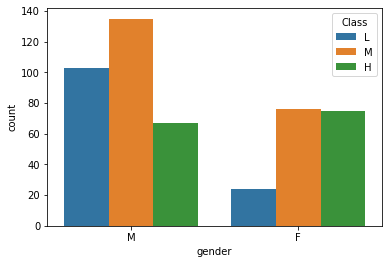

In [27]:
# gender


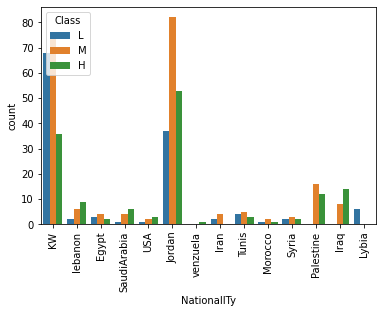

In [30]:
# NationalITy


<AxesSubplot:xlabel='ParentAnsweringSurvey', ylabel='count'>

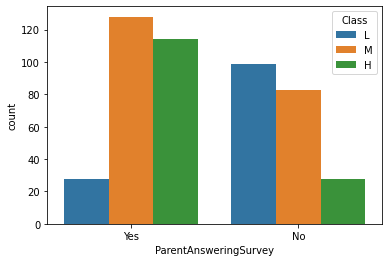

In [31]:
# ParentAnsweringSurvey


<AxesSubplot:xlabel='ParentschoolSatisfaction', ylabel='count'>

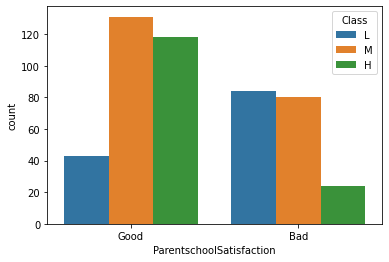

In [32]:
# ParentschoolSatisfaction


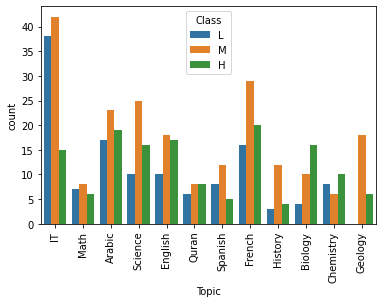

In [33]:
# Topic



### 문제 7. 범주형 대상 Class 컬럼을 수치로 바꾸어 표현하기

In [35]:
# L, M, H를 숫자로 바꾸어 표현하기 (eg. L: -1, M: 0, H:1)
# df['Class_value'] = 




,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


<BarContainer object of 2 artists>

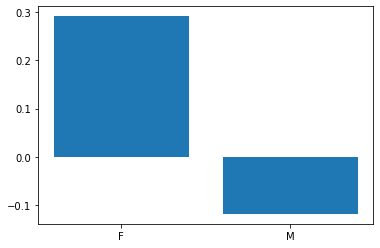

In [40]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기
# gb = 


<BarContainer object of 12 artists>

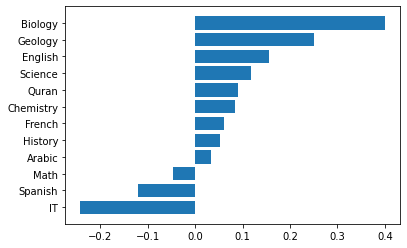

In [43]:
# Topic
# gb = 

<BarContainer object of 2 artists>

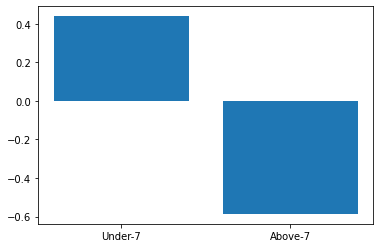

In [46]:
# StudentAbsenceDays
# gb =

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 8. 범주형 데이터 전처리하기


In [47]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_value'],
      dtype='object')

In [49]:
# one-hot 벡터로 변환하기
# Hint) Multicollinearity를 피하기
# drop = 'ParentschoolSatisfaction', 'Class', 'Class_value'
# columns = 'gender', 'NationalITy', 'PlaceofBirth',
#                             'StageID', 'GradeID','SectionID', 'Topic',
#                             'Semester', 'Relation', 'ParentAnsweringSurvey',
#                             'StudentAbsenceDays'

# X = 
# y = df['Class']



In [51]:
X.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
1,20,20,3,25,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
2,10,7,0,30,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [52]:
y.head()

0    M
1    M
2    L
3    L
4    M
Name: Class, dtype: object

### 문제 9. 학습데이터와 테스트데이터 분리하기


In [67]:
# import library


In [88]:
# 학습 데이터와 테스트 데이터 분리하기 / test size = 0.3 / random = 1
# X_train, X_test, y_train, y_test = 


## Step 4. Classification 모델 학습하기


### 문제 10. Logistic Regression 모델 생성/학습하기


In [69]:
# import library


In [70]:
# 모델 생성/학습
# model_lr = 



# 트레인 시키기





LogisticRegression(max_iter=10000)

### 문제 11. 모델 학습 결과 평가하기


In [71]:
# import library



In [72]:
# 예측을 수행하고 결과 출력하기





              precision    recall  f1-score   support

           H       0.77      0.67      0.72        55
           L       0.79      0.79      0.79        33
           M       0.60      0.68      0.64        56

    accuracy                           0.70       144
   macro avg       0.72      0.71      0.71       144
weighted avg       0.71      0.70      0.70       144



### 문제 12. XGBoost 모델 생성/학습하기


In [73]:
# import Library
from xgboost import XGBClassifier

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [79]:
# 모델 생성/학습
# model_xgb = 
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

### 문제 13. 모델 학습 결과 평가하기


In [89]:
# 예측을 수행하고 결과 출력하기
# pred = 
pred = model_xgb.predict(X_test)
y_test = y_test.map(dict(L=1,M=2,H=0))
print(pred)
print(y_test)
print(classification_report(y_test,pred))



[0 0 1 1 0 2 0 1 2 1 2 2 0 2 0 0 1 2 0 1 2 2 2 0 0 0 2 0 2 0 0 2 0 2 0 2 2
 2 2 1 0 2 2 1 2 1 2 2 1 0 2 0 1 1 0 2 1 2 0 2 2 0 1 2 2 2 2 2 1 0 2 0 0 1
 1 0 0 0 1 0 1 1 1 0 0 1 2 2 0 2 2 0 0 2 2 0 1 1 2 1 0 2 0 2 2 0 1 2 2 0 2
 0 0 0 2 0 2 1 0 0 2 1 1 1 2 2 2 2 2 2 2 0 2 2 2 1 2 0 2 2 1 1 2 0]
293    0
283    0
34     1
380    1
430    0
      ..
122    2
23     1
13     1
61     2
287    0
Name: Class, Length: 144, dtype: int64
              precision    recall  f1-score   support

           0       0.79      0.69      0.74        55
           1       0.85      0.85      0.85        33
           2       0.65      0.73      0.69        56

    accuracy                           0.74       144
   macro avg       0.76      0.76      0.76       144
weighted avg       0.75      0.74      0.74       144



## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Logistic Regression 모델 계수로 상관성 파악하기

In [91]:
# classes



array(['H', 'L', 'M'], dtype=object)

In [92]:
# shape


(3, 59)

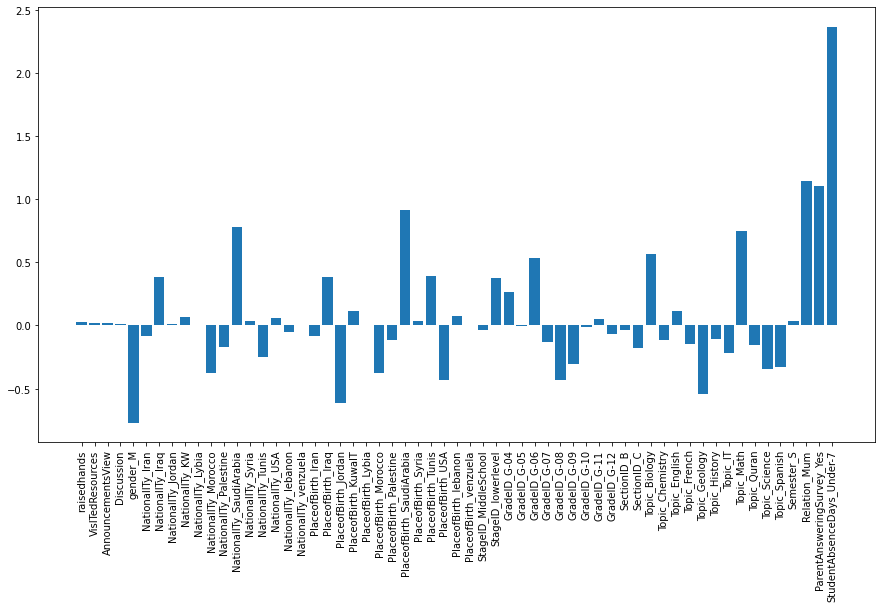

In [95]:
fig = plt.figure(figsize=(15,8))
plt.bar(X.columns, model_lr.coef_[0,:])
plt.xticks(rotation=90)
plt.show()

### 문제 15. XGBoost 모델로 특징의 중요도 확인하기

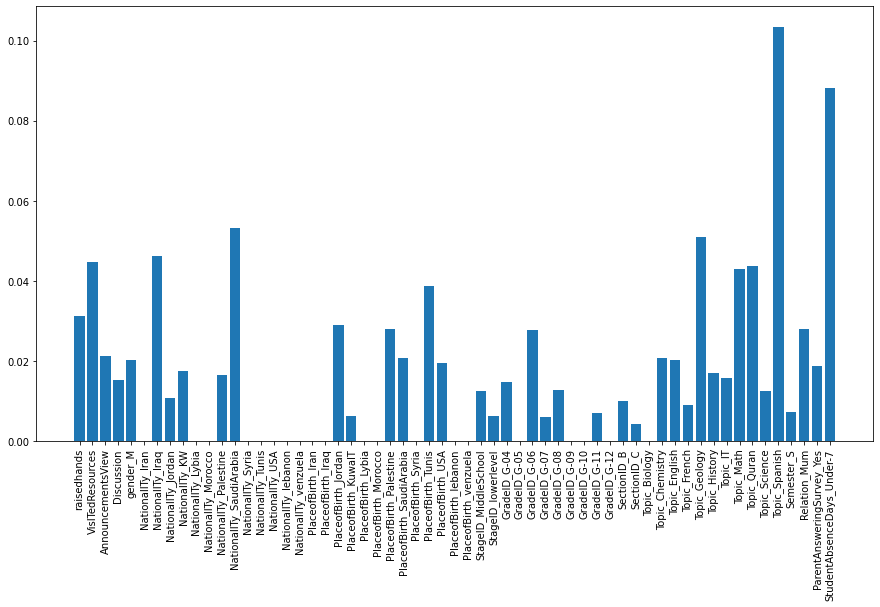

In [98]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
fig = plt.figure(figsize=(15,8))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

